#### Project Proposal: Group #21

## **Inferential Analysis on the Austin Animal Center**
#### _Group Members: Sadia, Youjung, Adam_

First, let's retrieve the necessary packages.

In [2]:
install.packages("infer")
library(infer)
install.packages("cowplot")
library(cowplot)
library(tidyverse)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



## **Introduction:**

**intro goes here...**

## **Preliminary Results:**

Now, read in the two relevant csv files from web and using the head function, see how they look.

In [4]:
intakes <- "https://raw.githubusercontent.com/adagfs/Stat_201_Group_Project/main/Austin_Animal_Center_Intakes.csv"
outcomes <- "https://raw.githubusercontent.com/adagfs/Stat_201_Group_Project/main/Austin_Animal_Center_Outcomes.csv"

animal_intakes <- read_csv(intakes)
head(animal_intakes)

animal_outcomes <- read_csv(outcomes)
head(animal_outcomes)

Rows: 142192 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Animal ID, Name, DateTime, MonthYear, Found Location, Intake Type,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
A665644,NA,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
A743852,Odin,02/18/2017 12:46:00 PM,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


Rows: 141980 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Animal ID, Name, DateTime, MonthYear, Date of Birth, Outcome Type,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NA,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NA,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
A821648,NA,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NA,Other,Unknown,1 year,Raccoon,Gray
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NA,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
A674754,NA,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
A659412,Princess,10/05/2020 02:37:00 PM,Oct 2020,03/24/2013,Adoption,NA,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown


In order to analyze the datasets, we must first tidy it. This included changing column names, filtering rows, and selecting columns relevant to later analysis. 

<!-- The two datasets had their column names changed to remove spaces and were filtered for the relevant information. For both datasets, Animal Type is filtered to only contain dog and cat while the Animal outcome table was also filtered for the outcome type `Adoption`, as this is the data relevant to our research question. In addition, the `DateTime` field in both tables was renamed, as one refers to the Date when the animal was taken in by the shelter while the other refers to when the animal left the shelter. We then select the relevant columns for each dataset. For the Animal Intake data it was Animal ID, DateTime_Intake, and Animal Type. For the Animal Outcome data it was Animal ID, DateTime_Outcome, and Animal Type. -->

In [7]:
#Discuss which columns are necessary in each dataset and filter it 
names(animal_intakes)<-str_replace_all(names(animal_intakes), c(" " = "_" , "," = "" ))
names(animal_outcomes)<-str_replace_all(names(animal_outcomes), c(" " = "_" , "," = "" ))

tidy_animal_intakes <- animal_intakes %>%
    filter(Animal_Type%in%c("Dog", "Cat")) %>%
    dplyr::rename(DateTime_Intake = DateTime) %>%
    select(Animal_ID, Animal_Type, DateTime_Intake)

tidy_animal_outcomes <- animal_outcomes %>%
    filter(Animal_Type%in%c("Dog", "Cat") & Outcome_Type == "Adoption") %>%
    dplyr::rename(DateTime_Outcome = DateTime) %>%
    select(Animal_ID, DateTime_Outcome)
head(tidy_animal_intakes)
head(tidy_animal_outcomes)

Animal_ID,Animal_Type,DateTime_Intake
<chr>,<chr>,<chr>
A786884,Dog,01/03/2019 04:19:00 PM
A706918,Dog,07/05/2015 12:59:00 PM
A724273,Dog,04/14/2016 06:43:00 PM
A665644,Cat,10/21/2013 07:59:00 AM
A682524,Dog,06/29/2014 10:38:00 AM
A743852,Dog,02/18/2017 12:46:00 PM


Animal_ID,DateTime_Outcome
<chr>,<chr>
A776359,07/18/2018 04:02:00 PM
A720371,02/13/2016 05:59:00 PM
A659412,10/05/2020 02:37:00 PM
A814515,05/06/2020 07:59:00 AM
A689724,10/18/2014 06:52:00 PM
A680969,08/05/2014 04:59:00 PM


To get time spent at the shelter, the two datasets were first combined using Animal_ID, and then filtered.

<!-- Now, with two clean datasets, they can be combined in order to have intake and adoption date information in the same dataset. Afterwards, the dataset will be filtered, removing any rows with DateTime_Outcome as N/A as these animals were not adopted and as such, are not in the focus of our question. (Needs more) -->

In [9]:
# all_animal_data <- merge(tidy_animal_intakes,tidy_animal_outcomes, by="Animal_ID") %>%
#     filter(!is.na(DateTime_Outcome))
# head(all_animal_data)
# nrow(all_animal_data)

adoption_time_data <- merge(tidy_animal_intakes,tidy_animal_outcomes, by="Animal_ID") %>%
    filter(!is.na(DateTime_Outcome)) %>%
    mutate(DateTime_Outcome = as.Date(DateTime_Outcome, format = "%m/%d/%Y"),
          DateTime_Intake = as.Date(DateTime_Intake, format = "%m/%d/%Y"),
          Shelter_Period = as.numeric(difftime(DateTime_Outcome, DateTime_Intake, unit = "days"))) %>%
    filter(Shelter_Period >= 0) %>%
    select(Animal_Type, Shelter_Period)
head(adoption_time_data)
nrow(adoption_time_data)

,Animal_Type,Shelter_Period
,<chr>,<dbl>
1,Dog,50
2,Dog,9
3,Dog,23
4,Dog,90
5,Dog,3
6,Dog,147


[1] 73378

_Table 1:_

In order to analyze the data, samples of size 200 were created for dogs and cats. Their sample distributions are plotted below.

<!-- And that's a clean dataset! In order to analyze the time taken for adoption, we find Shelter Time. Then, take a sample of 200. The seed is 310. Plot sample distributions. -->

In [26]:
options(repr.plot.width = 10)
set.seed(310)

# Get datasets filtered by species
adoption_time_data_dog <- adoption_time_data %>%
    filter(Animal_Type == "Dog")

adoption_time_data_cat <- adoption_time_data %>%
    filter(Animal_Type == "Cat")

# Dog: Sample (size 200) and Median/IQR Statistics
dog_sample_200 <- adoption_time_data_dog %>%
    rep_sample_n(size = 200) 

#Dog: Sample median calculated
sample_dog_median <- dog_sample_200 %>%
    summarize(med = median(Shelter_Period)) %>%
    pull()

sprintf("Dog median for 200 samples: %.2f", sample_dog_median)


# Cat: Sample (size 200)
cat_sample_200 <- adoption_time_data_cat %>%
    rep_sample_n(size = 200) 

#Cat: Sample median calculated
sample_cat_median <- cat_sample_200 %>%
    summarize(med = median(Shelter_Period)) %>%
    pull()

sprintf("Cat median for 200 samples: %.2f", sample_cat_median)

[1] "Dog median for 200 samples: 10.00"

[1] "Cat median for 200 samples: 33.50"

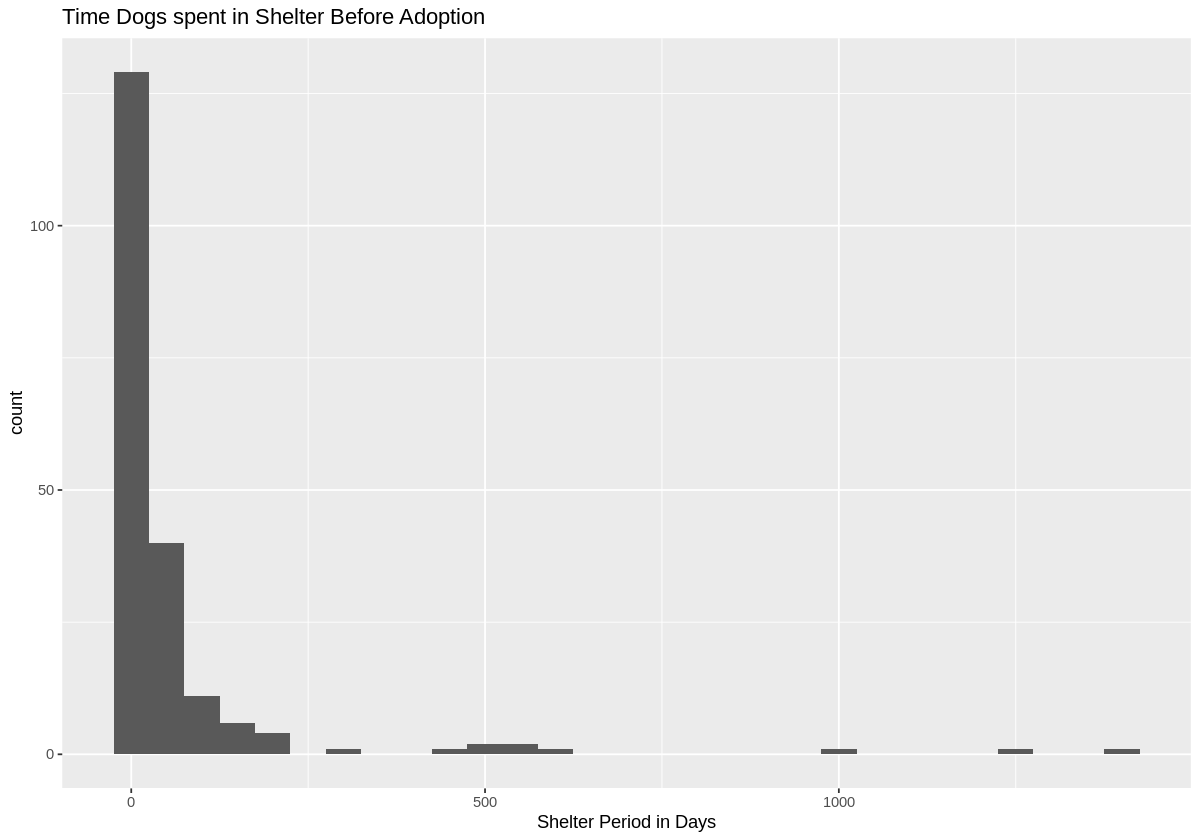

In [27]:
# Dog: Sample200 histogram
animal_sample200_dog_dist <- dog_sample_200 %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 50) +
                            labs(x = "Shelter Period in Days", title = "Time Dogs spent in Shelter Before Adoption")
animal_sample200_dog_dist

_Figure 1: Distribution of Sample of Time **Dogs** Spent_

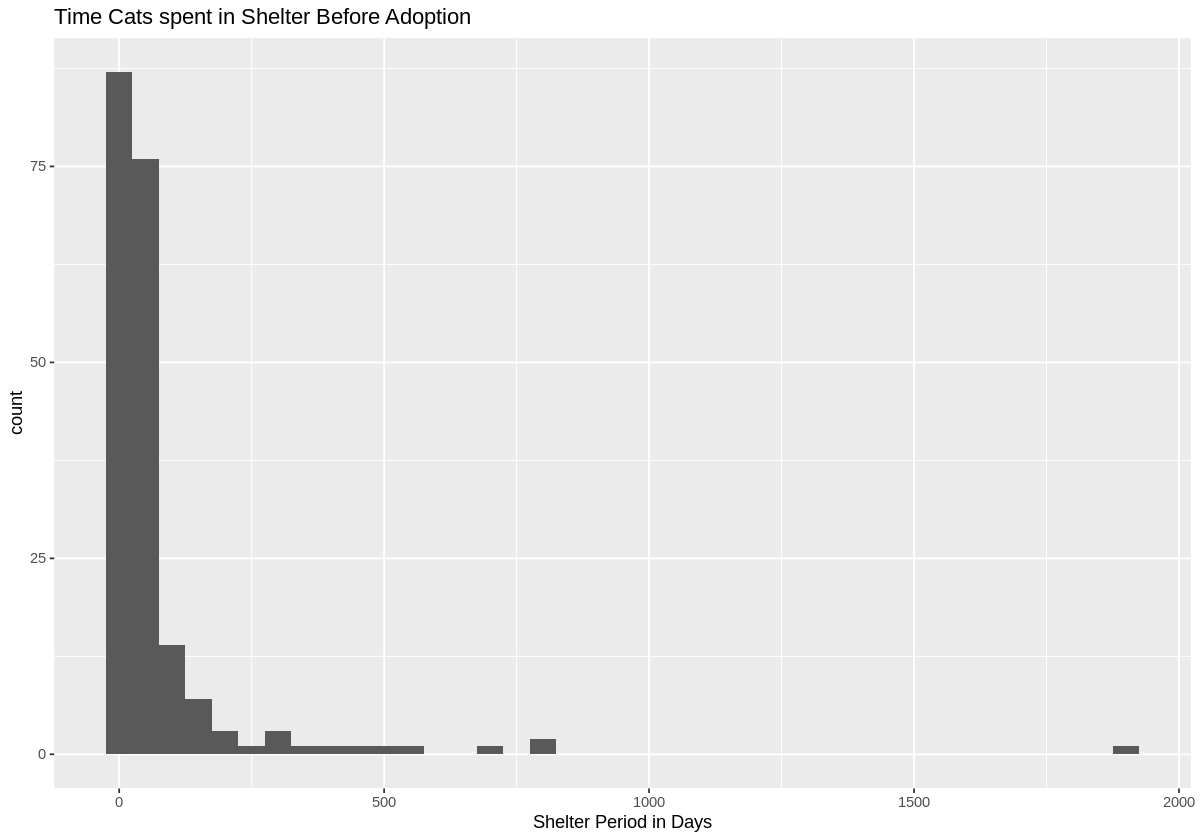

In [29]:
# # Cat: Sample200 histogram
animal_sample200_cat_dist <- cat_sample_200 %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 50) +
                            labs(x = "Shelter Period in Days", title = "Time Cats spent in Shelter Before Adoption")
animal_sample200_cat_dist

_Figure 2: Distribution of Sample of Time **Cats** Spent_

Now, we find the IQR for the measure of spread as we are working with skewed data.

In [30]:
#dog_sample_200
summary(dog_sample_200$Shelter_Period)
IQR(dog_sample_200$Shelter_Period)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    5.00   10.00   63.16   41.00 1404.00 

[1] 36

In [31]:
#cat_sample_200
summary(cat_sample_200$Shelter_Period)
IQR(cat_sample_200$Shelter_Period)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.75   33.50   74.30   61.00 1914.00 

[1] 52.25

## Methods:

The well developed reports provide important guidelines to follow. Also it helps to predict further problems and improve decision making to draw conclusions about statistical inference. The report trustworthy is determined with the data taken and the progress of statistical inference; testing hypotheses and deriving estimates. Individual test subjects approached this survey is representative, generalized, and unbiased of the results, and null hypothesis is well developed to prove the alternate hypothesis is true when $H_0$ is rejected. The median value allows us to find the conclusive result without affected by extreme values. 

However, the estimates we produced are not enough to give to stakeholders since the sample size was made without considering margin errors and the confidence interval is wide to conclude certain.

We expect to find the mean period of staying in the shelter for each dog and cat, and it also indicates a difference between the period of staying in the shelter for dogs and cats. This impact not only to shelter employers or stakeholders to improve shelter conditions and environment suitable, caregivers could improve their plan to give up the adoption for the animals who stayed the longer. The future questions this could lead is the more specific conditions that each animal affects to the period of staying in the shelter. Their age, sex, or health could also influences to the period of staying. Therefore, it is important to compare their adoption conditions to find whether the result is affected or not affected by not only species but also conditions.  
